In [1]:
import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit




In [108]:
def make_frames(parameterization):
    rootdir = 'temp/'
    predictions = pd.DataFrame()
    stats1 = pd.read_pickle(rootdir + 'model_statistics_mae_' + parameterization + '.pkl')
    stats1['parameter ratio'] = stats1['trained parameters'] / stats1['inputs']
    stats1 = stats1.reset_index()
    stats1 = stats1.drop('index', axis = 1)
    stats2 = pd.read_pickle(rootdir + 'model_statistics_mse_' + parameterization + '.pkl')
    stats2['parameter ratio'] = stats2['trained parameters'] / stats2['inputs']
    stats2 = stats2.reset_index()
    stats2 = stats2.drop('index', axis = 1)
    stats1 = stats1.sort_values('parameter ratio')
    stats2 = stats2.sort_values('parameter ratio')
    
    stats = stats1.join(stats2,lsuffix = '_x',rsuffix = '_y')
#     print(stats)

    
    stats = stats.drop(stats[stats['test loss avg_y'] == np.inf].index)
#     print(stats)

    fig, ax = plt.subplots()
    x1 = stats['parameter ratio_x']
    y1 = stats['test loss avg_x']
    ax.scatter(
    x1,y1,
    alpha = 0.5,
        label = 'MAE'
    )


    model1 = np.poly1d(np.polyfit(x1, y1, 2))
    ax.plot(x1, model1(x1), alpha = 0.5)

#     ax.set_xticks(ticks = x_ticks, labels = x_ticks)
    ax2 = ax.twinx()
    x2 = stats['parameter ratio_y']
    y2 = np.log(stats['test loss avg_y'])
    ax2.scatter(
    x2,y2,
    color = 'r',
    alpha = 0.5,
        label = 'MSE'
    )

    model2 = np.poly1d(np.polyfit(x2, y2, 2))
    ax2.plot(x2, model2(x2), alpha = 0.5,c = 'r')
    
    
    sts = stats[
        (stats['test loss avg_x'] <= model1(x1)) &
        (stats['test loss avg_x'] <= model2(x2)) &
        (np.log(stats['test loss avg_y']) <= model2(x2)) &
        (np.log(stats['test loss avg_y']) <= model1(x1))
    ]
#     print(sts)

    
    std = stats.drop(sts.index)
    
    ax.scatter(
        std['parameter ratio_x'],
        (std['test loss avg_x']),
        color = 'k',
        marker = 'x',
        s = 100
    )
    ax2.scatter(
        std['parameter ratio_y'],
        np.log(std['test loss avg_y']),
        color = 'k',
        marker = 'x',
        s = 100
    )
    ax.scatter(
        sts['parameter ratio_x'],
        (sts['test loss avg_x']),
        color = 'orange'
    )
    ax2.scatter(
        sts['parameter ratio_y'],
        np.log(sts['test loss avg_y']),
        color = 'orange'
    )
    
    
    
#     popt, pcov = curve_fit(lambda t,a,b: a*np.exp(b*t),  x,  y,  p0=(4, 0.1))
#     plt.plot(x, popt[0]*np.exp(popt[1]*x),c = 'red', alpha = 0.5) #same as line above \/

    fig.patch.set_facecolor('w')
    ax.grid(False)
    ax2.grid(False)
    ax.set_xlabel('Trained Parameters / Inputs')
    ax.set_ylabel('Mean Absolute Error (m)')
    ax2.set_ylabel('Log Mean Squared Error (m$^2$)')
#     plt.title('Model Comparison of MAE vs MSE\nParameterization ' + parameterization)
#     plt.legend()
    plt.show()



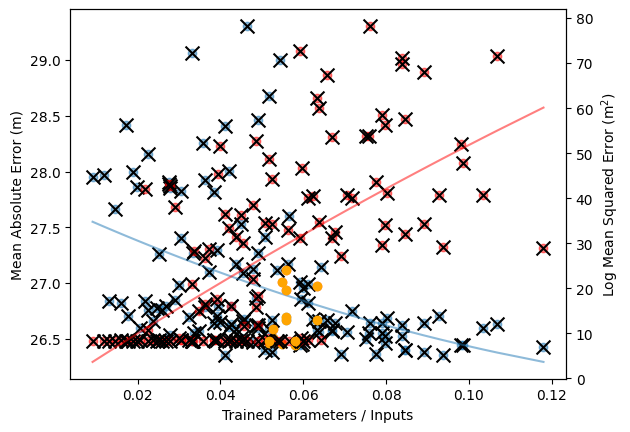

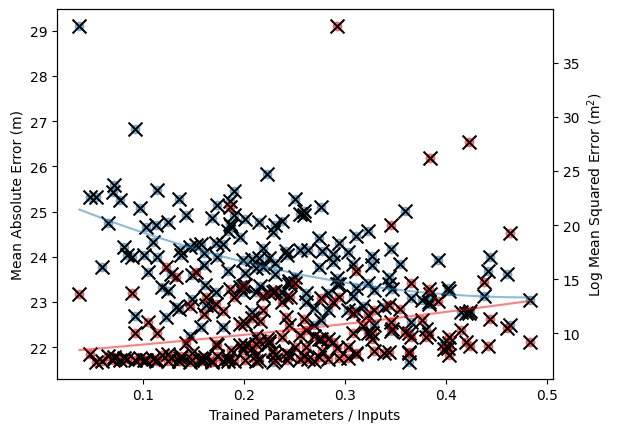

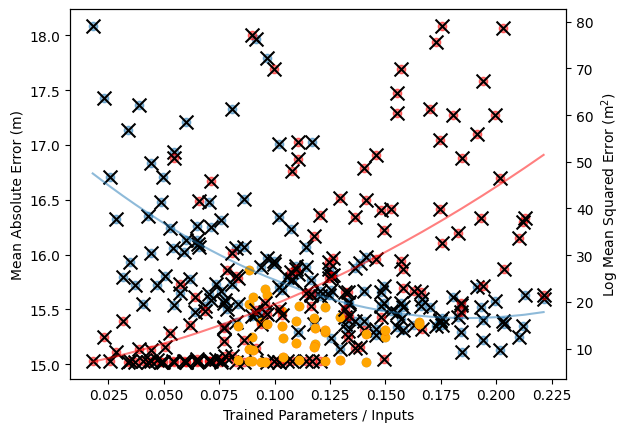

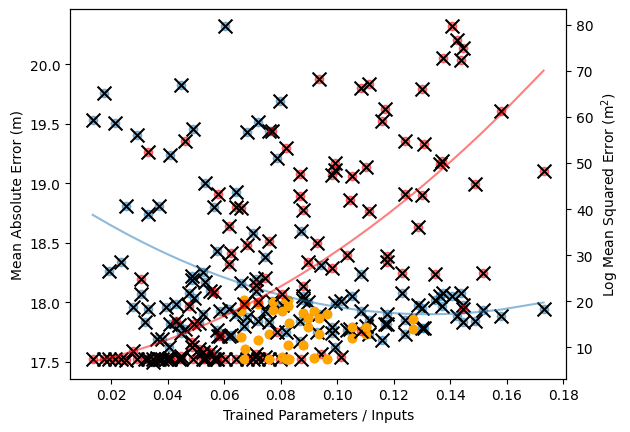

In [109]:
for j in range(1,5,1):
    make_frames(str(j))